In [56]:
import pandas as pd
import numpy as np
import pylab as plt #use matplotlib para python > 3 e conda

from IPython.display import Image, display

from __future__ import division #remova isso caso python > 3
from __future__ import print_function # remova isso caso python > 3

In [5]:
caminho = "C:/Users/Felipe/Documents/GitHub/pythonstat/ex_regressao_outros/"
#se o inicializar o conda+jupyter pelo terminal:  colocar caminho = "" 
arquivo ="ToolDataSheetVsNQuebras.csv" #<- arquivo a ser utilizado

### Variável dependente (para predição -y-):
*Número de quebras por ano*: `nQuebras`

### Chave primária: 
*código do tipo da ferramenta*:  `PartNumber`

### Variáveis independentes:
*geometria e parâmetros da ferramenta de corte* 

1. `LargerDiameter`
2. `StemDiameter`
3. `TotalLength`
4. `ChannelLength`

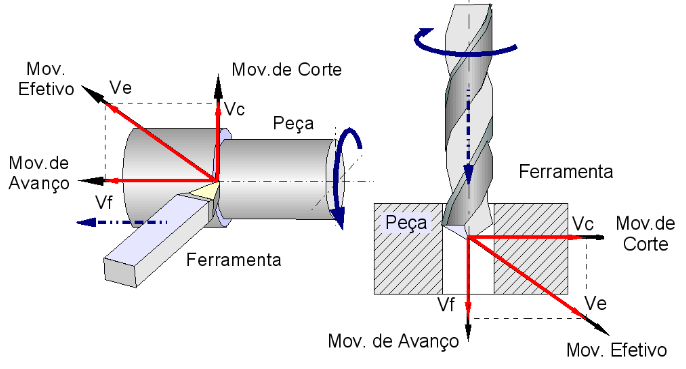

In [16]:
# display(Image(caminho+"usinagem_geo.PNG"))

In [24]:
dadosB = None

try:  # carrega dos dados , o separador é ";" pois tem campos na coluna Supplier com ","
    dadosB = pd.read_csv(caminho+arquivo, sep=";")
except IOError as err:
    print (err)

In [25]:
dadosB = dadosB[dadosB.PropellerAngle <= 360] #remove os demais dados incorretos

In [26]:
dadosB.head(1)

,PartNumber,nQuebras,Family,Supplier,LargerDiameter,StemDiameter,TotalLength,ChannelLength,MaterialClass,PropellerAngle,Refrigeration
0,4721700050,5,217-RH,3M TECHNICAL CERAMICS ZWEIGNIEDERLA,3.0,3.0,38.0,2.5,Desconhecido,0.0,0


In [22]:
#requer sklearn:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [27]:
#funções utilitárias:

def get(data, coluna): return data.loc[:,[coluna]] #pega a coluna de um conteiner do pandas e retorna um novo DataFrame

def rss(y,predicted):
    return float(((predicted - y) ** 2.0).sum())

def norm(vetor): return vetor/(vetor.max()) #normaliza caso o vetor/variavel tenha o método max()

def calc_rss(y, predicted): return rss( norm (y), norm (predicted)) #normaliza e calcular RSS

def doMatPlotText(texto, x=0.5, y=0.5, cor='red'): plt.text(x,y, texto, horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor=cor, alpha=0.5))
    
def ordemZero(x, s=500): #plota o gráfico da predição interpolando os valores
    return np.linspace(
        min(x.values.ravel()),
        max(x.values.ravel()), s )[:, np.newaxis]

In [51]:
def knn_plotter(xx,yy,dataset, kernel=None, titulo=" "):
    """
    Faz a regressão indicando o objeto em kernel com uma base de dados, a coluna X e a predicao Y

    Keyword arguments:
    xx -- str: variavel independente (nome da coluna da base de dados)
    yy -- str: variavel dependente  (nome da coluna para predicao)
    dataset -- pandas.Dataframe : conjunto de dados do Pandas (requer as series xx e yy), exemplo: KNeighborsRegressor(n_neighbors=3)
    titulo -- str: titulo do grafico (suporta subplot)
    
    """
    (varXnome,varYnome) = (xx , yy)
  
    X_knn, Y_knn = ( get(dataset,varXnome), get(dataset,varYnome) )
    
    KnnModel = kernel 

    KnnModel.fit(X_knn, Y_knn )

    Yp_knn = KnnModel.predict( X_knn )
  
    Yp_knn_interpol = KnnModel.predict( ordemZero( X_knn ) ).flatten()

    knn_rss = 0.0
    
    try: #algumas classes do sklearn não retornam array, e sim uma serie de dados:
        knn_rss = calc_rss(Y_knn, Yp_knn)
    except:
        knn_rss = calc_rss(Y_knn[yy], Yp_knn)
  
    mlabel =  "rss={0:.3f}".format(knn_rss)     #colocar o rss numa legenda do plt   

    plt.plot( X_knn, Y_knn, "db", label="ori."); 
    plt.title(titulo)
    plt.plot(ordemZero( X_knn ), 
             Yp_knn_interpol, "--r", label=mlabel); 
    plt.xlabel(varXnome); plt.ylabel(varYnome);
    plt.legend(); plt.grid();
    

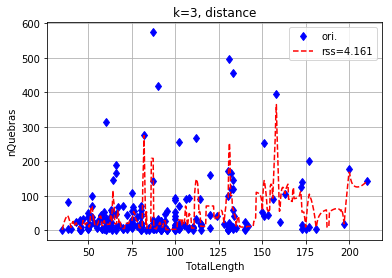

In [57]:
k=3
metodo='distance'
KnnModel = KNeighborsRegressor(n_neighbors=k,weights=metodo)
knn_plotter('TotalLength','nQuebras',dadosB, KnnModel, titulo="k={0}, {1}".format(k,metodo))

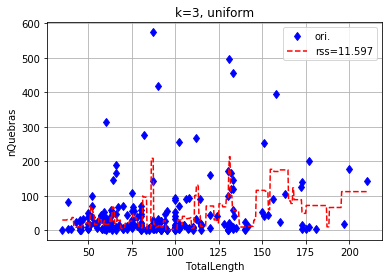

In [58]:
k=3
metodo='uniform'
KnnModel = KNeighborsRegressor(n_neighbors=k,weights=metodo)
knn_plotter('TotalLength','nQuebras',dadosB, KnnModel, titulo="k={0}, {1}".format(k,metodo))